# Creating Scatterplots (Crossplots) of Well Log Data
The accompanying video for this notebook can be found on my YouTube channel at:  
Please check it out, like and subscribe.

## Introduction

Scatterplots are a commonly used data visualisation tool to allow us to identify and determine if there is a relationship between two variables. We will also be able to tell if that relationship is a strong one or if there is no relationship.

Within petrophysics scatterplots, or crossplots, are routinely used as part of the interpretation workflow. They allow us to determine key interpretation parameters such as 

- clay and shale end points for our clay or shale volume calculations
- outlier detection
- lithology identification
- hydrocarbon identification
- rock typing
- regression analysis
- and more

In this short tutorial we will see how to display histograms from one of the Volve Wells.

## Importing Libraries and Loading LAS Data
The first stage of any python project or notebook is generally to import the required libraries. In this case we are going to be using `lasio` to load our las file, `pandas` for storing our well log data, and `matplotlib` for visualising our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

The data we are using for this short tutorial comes from the publicly released Equinor Volve dataset. Details of which can be found [here](https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html)

To read the data we will use the lasio library which we explored in the previous notebook and [video](https://youtu.be/8U4gxMJybJs).

In [2]:
las = lasio.read("Data/15-9-19_SR_COMP.LAS")

The next step is to convert out las file into a pandas dataframe. This is quickly achieved by calling upon the `.df()` method from lasio.

To confirm we have the correct data, we can then call upon the `describe()` method which will give us information about the data contained within it.

In [3]:
df = las.df()
df.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781
std,18.390705,1.019751,0.165122,32.922780,14.729530,6.631202,5.735731
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400
max,181.813900,20.330400,3.001300,304.333700,146.347400,198.537100,168.604400


In [4]:
df.head(10)

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
102.9188,NaN,NaN,NaN,15.6696,NaN,NaN,NaN
103.0712,NaN,NaN,NaN,17.9443,NaN,NaN,NaN
103.2236,NaN,NaN,NaN,18.0740,NaN,NaN,NaN
103.3760,NaN,NaN,NaN,18.2037,NaN,NaN,NaN


## Creating a Crossplot / Scatterplot
Now that we have our data loaded, we can begin creating our first scatterplot/crossplot of our logging data, in particular, we will use the density and neutron porosity measurements. These two measurements are often plotted like this and can tell us a number of different things about the intervals logged, including hydrocarbon presence, lithology, and bad data etc.

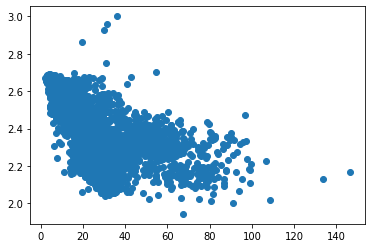

In [5]:
# Set up the scatter plot
plt.scatter(x='NEU', y='DEN', data=df)

plt.show()

Before we progress, we can set the default plot size for our scatterplots using `plt.rcParams`.

We can see above that we now have a very simple and not very informative crossplot. Firstly, the values and the way data is displayed is different to what we would expect.

In [6]:
plt.rcParams['figure.figsize'] = (8, 8)

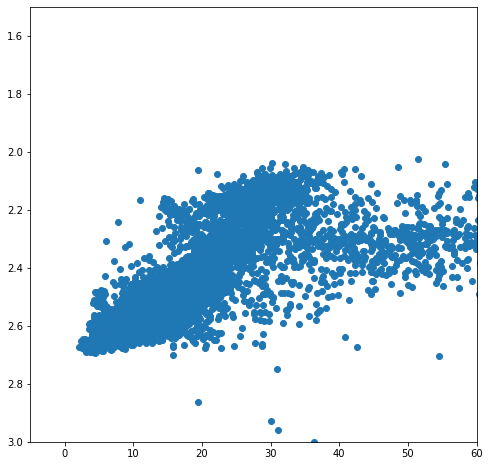

In [7]:
# Set up the scatter plot
plt.scatter(x='NEU', y='DEN', data=df)

# Change the X and Y ranges
plt.xlim(-5, 60)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)

plt.show()

### Adding Labels to the Axes

The scatterplot above is not much use to anyone else, there are no labels or units on the axes. So we need to tell the reader of the plot what is plotted against what.

We can add these in using `plt.xlabel` and `plt.ylabel`.

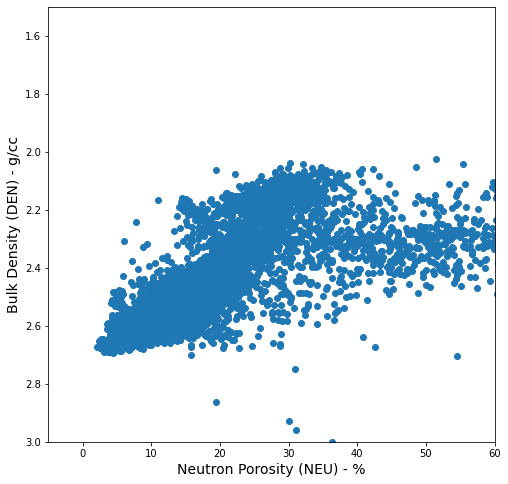

In [8]:
# Set up the scatter plot
plt.scatter(x='NEU', y='DEN', data=df)

# Change the X and Y ranges
plt.xlim(-5, 60)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)

# Add in labels for the axes
plt.ylabel('Bulk Density (DEN) - g/cc', fontsize=14)
plt.xlabel('Neutron Porosity (NEU) - %', fontsize=14)

plt.show()

Excellent! We now know what data is plotted on our plot, and what units they are plotted in.

We can add a third variable onto our scatterplot through the use of colour. For this plot, we will add in the `c` argument and pass it the Gamma Ray (GR) column from the dataframe.

To control the range of colours shown we need to pass in values to `vmin` and `vmax`. In this example, we will set these to 0 and 100.

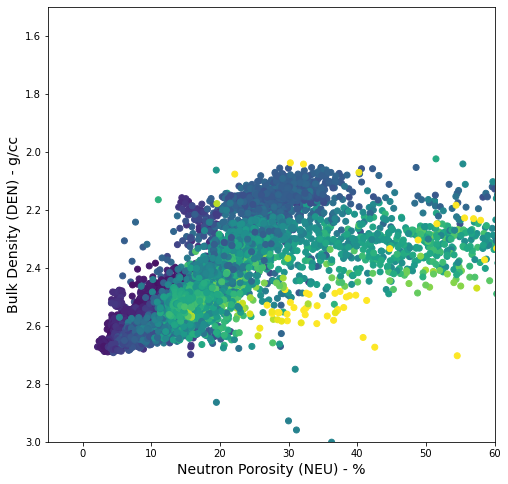

In [9]:
# Set up the scatter plot
plt.scatter(x='NEU', y='DEN', data=df, c='GR', vmin=0, vmax=100)

# Change the X and Y ranges
plt.xlim(-5, 60)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)

# Add in labels for the axes
plt.ylabel('Bulk Density (DEN) - g/cc', fontsize=14)
plt.xlabel('Neutron Porosity (NEU) - %', fontsize=14)

plt.show()

### Changing Colormap and Adding Colorbar

To understand what the colours on the plot mean, we can add a colorbar. There are a few ways to add colorbars to our plot. As we are just using `plt.scatter` which is a single figure, we can call upon `plt.colorbar()` and the also pass in the label we want to display alongside it.

To change the colour map we are using, we can set it to one of the ones at the webpage below using the `cmap` argument in `plt.scatter()`. For this example, we will use rainbow. This will allow low Gamma Ray values to appear in purple/blue and high values to appear in red.

https://matplotlib.org/stable/tutorials/colors/colormaps.html

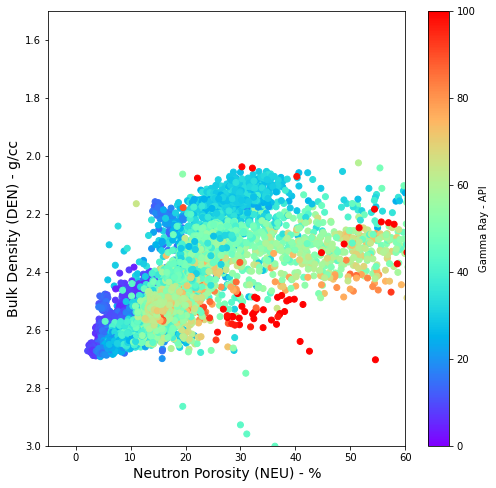

In [10]:
# Set up the scatter plot
plt.scatter(x='NEU', y='DEN', data=df, c='GR', vmin=0, vmax=100, cmap='rainbow')

# Change the X and Y ranges
plt.xlim(-5, 60)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)

# Add in labels for the axes
plt.ylabel('Bulk Density (DEN) - g/cc', fontsize=14)
plt.xlabel('Neutron Porosity (NEU) - %', fontsize=14)

# Make the colorbar show
plt.colorbar(label='Gamma Ray - API')

plt.show()

### Adding Gridlines & Plot Styling

Style sheets allow us to control the look and feel of the plots. You can find a full list of examples on the matplotlib website at: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

To set a style sheet we can use `plt.style.use('bmh')`. 'bmh' is a particular style that can be found in the reference link above.

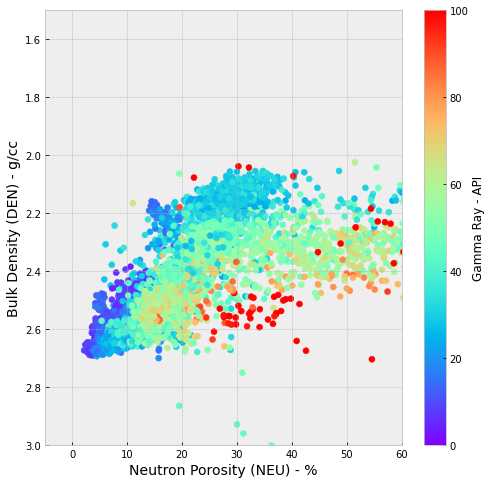

In [11]:
#Set the style sheet to bmh
plt.style.use('bmh')

# Set up the scatter plot
plt.scatter(x='NEU', y='DEN', data=df, c='GR', vmin=0, vmax=100, cmap='rainbow')

# Change the X and Y ranges
plt.xlim(-5, 60)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)

# Add in labels for the axes
plt.ylabel('Bulk Density (DEN) - g/cc', fontsize=14)
plt.xlabel('Neutron Porosity (NEU) - %', fontsize=14)

plt.colorbar(label='Gamma Ray - API')

plt.show()

### Changing the Data
If we wanted to view other curves on our plot, we can swap our variables in the `plt.scatter` line. In this example, we have switched the NEU data for AC (Acoustic Compressional Slowness). Once we have done this, we can quickly update the scales and the labels.

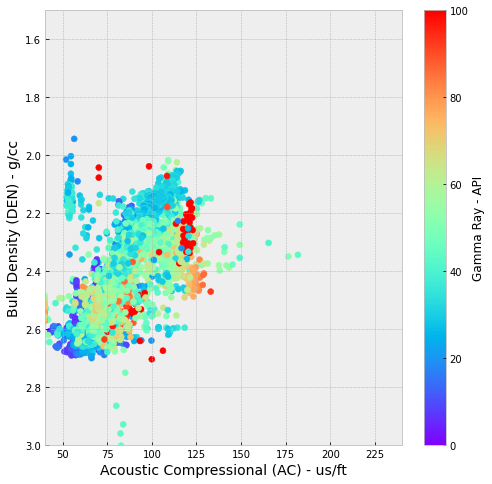

In [12]:
#Set the style sheet to bmh
plt.style.use('bmh')

# Set up the scatter plot
plt.scatter(x='AC', y='DEN', data=df, c='GR', vmin=0, vmax=100, cmap='rainbow')

# Change the X and Y ranges
plt.xlim(40, 240)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)

# Add in labels for the axes
plt.ylabel('Bulk Density (DEN) - g/cc', fontsize=14)
plt.xlabel('Acoustic Compressional (AC) - us/ft', fontsize=14)

plt.colorbar(label='Gamma Ray - API')

plt.show()

# Summary

In this short tutorial we have covered the basics of how to display a scatterplot / crossplot of well log data, how to improve it by adding labels and by adding a colour bar to provide additional information.

---

*Thanks for reading!*

*If you have found this article useful, please feel free to check out my other articles looking at various aspects of Python and well log data. You can also find my code used in this article and others at [GitHub](https://github.com/andymcdgeo).*

*If you want to get in touch you can find me on [LinkedIn](https://www.linkedin.com/in/andymcdonaldgeo/) or at my [website](http://andymcdonald.scot/).*

*Interested in learning more about python and well log data or petrophysics? Follow me on [Medium](https://medium.com/@andymcdonaldgeo).*

*If you have enjoyed this notebook, video or article or any others and want to show your appreciation you are welcome to [Buy Me a Coffee](https://www.buymeacoffee.com/andymcdonaldgeo)*